### Ближайшие соседи



### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [2]:
df.isnull().sum() # пропусков не обнаружено

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

источник: https://levelup.gitconnected.com/convert-percentage-string-to-numeric-and-vice-versa-in-pandas-18a3d66e2853

In [3]:
df['CareerBasedonDegree'].str.rstrip("%").astype(float)/100

0      0.50
1      0.75
2      0.50
3      0.50
4      0.25
       ... 
230    0.50
231    0.75
232    0.50
233    0.75
234    0.75
Name: CareerBasedonDegree, Length: 235, dtype: float64

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

источники:https://ru.stackoverflow.com/questions/1349631/%D0%9A%D0%B0%D0%BA-%D1%83%D0%B1%D1%80%D0%B0%D1%82%D1%8C-%D0%BD%D0%B5%D0%BD%D1%83%D0%B6%D0%BD%D1%8B%D0%B5-%D1%81%D0%BB%D0%BE%D0%B2%D0%B0-%D0%B8-%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B8%D1%82%D1%8C-%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE-%D1%86%D0%B8%D1%84%D1%80%D1%8B


https://dyakonov.org/2019/09/23/python-%D0%B8-pandas-%D0%B4%D0%B5%D0%BB%D0%B0%D0%B5%D0%BC-%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%B5%D0%B5/

In [4]:
df['new_Daily_Studying_Time']=df['DailyStudingTime'].str.replace(r"[^-\d\.]", "", regex=True).str.split('-').apply(lambda x:x[0])
df['new_Games_Spending_Time']=df['GamesSpendingTime'].str.replace(r"[^-\d\.]", "", regex=True).str.split('-').apply(lambda x:x[0])
df['new_Travelling_Time']=df['TravellingTime '].str.replace(r"[^-\d\.]", "", regex=True).str.split('-').apply(lambda x:x[0])

df.drop('DailyStudingTime', axis=1, inplace=True)
df.drop('GamesSpendingTime',axis=1, inplace=True)
df.drop('TravellingTime ', axis=1, inplace=True)

In [5]:
# меняем значения в получившейся переменной время на путешествия и аналогично в остальных
df['new_Travelling_Time'].unique()
df['new_Travelling_Time'] = df['new_Travelling_Time'].replace('1', '60')
df['new_Travelling_Time'] = df['new_Travelling_Time'].replace('2', '120')
df['new_Travelling_Time'] = df['new_Travelling_Time'].replace('3', '180')
df['new_Travelling_Time'] = df['new_Travelling_Time'].replace('1.30', '90')
df['new_Travelling_Time'] = df['new_Travelling_Time'].replace('2.30', '150')

In [6]:
df['new_Daily_Studying_Time'].unique()
df['new_Daily_Studying_Time'] = df['new_Daily_Studying_Time'].replace('1', '60')
df['new_Daily_Studying_Time'] = df['new_Daily_Studying_Time'].replace('2', '120')
df['new_Daily_Studying_Time'] = df['new_Daily_Studying_Time'].replace('3', '180')
df['new_Daily_Studying_Time'] = df['new_Daily_Studying_Time'].replace('4', '240')

In [7]:
df['new_Games_Spending_Time'].unique()
df['new_Games_Spending_Time']=df['new_Games_Spending_Time'].replace('1', '60')
df['new_Games_Spending_Time']=df['new_Games_Spending_Time'].replace('2', '120')
df['new_Games_Spending_Time']=df['new_Games_Spending_Time'].replace('1.30', '90')
df.head()# удостовериться,  что все нужные значения на месте

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,StressLevel,FinancialStatus,PartTimeJob?,new_Daily_Studying_Time,new_Games_Spending_Time,new_Travelling_Time
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,Morning,40000,No,50%,Bad,Bad,No,0,90,30
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,Morning,15000,Yes,75%,Bad,Bad,No,30,60,0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,Anytime,13000,Yes,50%,Awful,Bad,No,60,120,30
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,Anytime,1500000,No,50%,Bad,good,No,60,90,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,Morning,50000,Yes,25%,Good,good,No,30,90,30


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [8]:
df.describe() # на основе имеющихся переменных, для предсказания ЦП будут взяты: оценка 12Mark, College Mark и Salary Expectation

,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,SalaryExpectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04
std,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

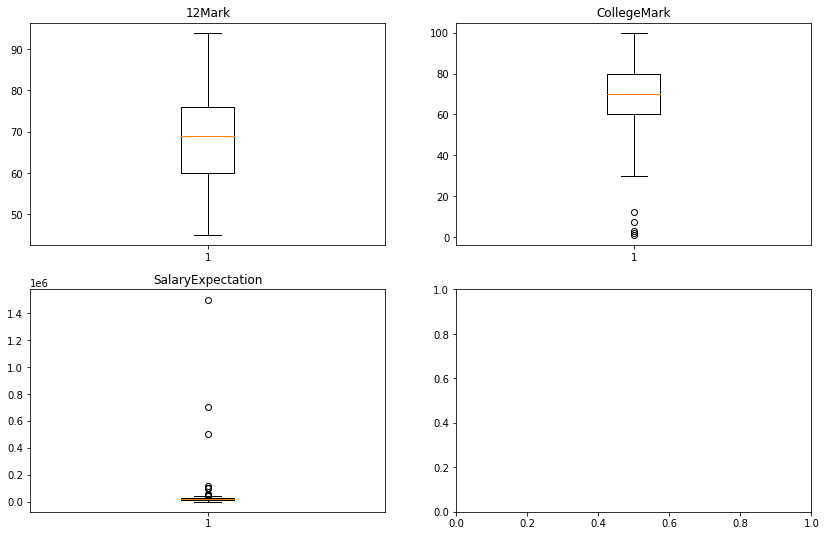

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[0][0].boxplot(df['12Mark']);
ax[0][0].set_title('12Mark');

ax[0][1].boxplot(df.CollegeMark);
ax[0][1].set_title('CollegeMark');

ax[1][0].boxplot(df.SalaryExpectation);
ax[1][0].set_title('SalaryExpectation');

# видим, что выбросы присутствуют в College Mark и Salary Expectation, в последнем количество которых больше, что возможно связано с тем, что оценки в колледже имеют четкие верхние и нижние границы, в то время как зарплатные ожиания могут быть любого размера


**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

<AxesSubplot:>

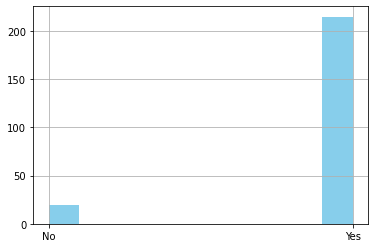

In [10]:
y=df['LikeDegree']
y.hist(color = "skyblue")
# дисбаланс классов присутствует, так как доля ответивших утвердительно почти в 10 раз больше ответивших отрицательно.
# в качестве метрик качества можно взять f1, полнота recall и точность precision 
# accuracy не берем из-за имеющейся у нас проблемы неравных классов которую она не учитывает

**Задание 8.**  Переведите целевую переменную к численному формату.

In [11]:
# источник: семинар 13
y[y == 'Yes'] = 1
y[y == 'No'] = -1
df.head()

/var/folders/mp/4ncxpf7d2wg2lslq6lky9swh0000gn/T/ipykernel_25241/3827330172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'Yes'] = 1
/var/folders/mp/4ncxpf7d2wg2lslq6lky9swh0000gn/T/ipykernel_25241/3827330172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'No'] = -1


,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,StressLevel,FinancialStatus,PartTimeJob?,new_Daily_Studying_Time,new_Games_Spending_Time,new_Travelling_Time
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,Morning,40000,-1,50%,Bad,Bad,No,0,90,30
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,Morning,15000,1,75%,Bad,Bad,No,30,60,0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,Anytime,13000,1,50%,Awful,Bad,No,60,120,30
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,Anytime,1500000,-1,50%,Bad,good,No,60,90,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,Morning,50000,1,25%,Good,good,No,30,90,30


### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [12]:
#источник: семинар 12
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)
X = df[['12Mark', 'CollegeMark', 'SalaryExpectation']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (164, 3)
Размер тестовой выборки: (71, 3)


**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [13]:
# источник: семинар 11
y_m = 1 # предположим, что все студенты довольны (среднее/медиана будут равны 1)
y_pred_naive = np.ones(len(y_test)) * y_m  
y_pred_naive[:3]

from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred_naive))

RMSE: 0.5814018997338111


**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [14]:
needed_variables = ["12Mark", 
                  "CollegeMark",
                  "SalaryExpectation"
                 ]
y_train=y_train.to_numpy().astype('int')
y_test=y_test.to_numpy().astype('int')

In [15]:
# при 3 ближайших соседях мы получаем следующее
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)
p_pred_knn = classifier.predict_proba(X_test) 
p_pred_knn = p_pred_knn[:, 1]
print(p_pred_knn)

[1.         0.66666667 0.66666667 1.         1.         0.66666667
 1.         1.         1.         1.         1.         0.66666667
 1.         1.         1.         1.         0.66666667 0.66666667
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.66666667 0.66666667 1.         1.         1.         0.66666667
 0.66666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.66666667 1.
 0.66666667 0.66666667 0.66666667 1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 0.66666667 0.66666667 1.         1.         1.        ]


In [16]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)
p_pred_knn = classifier.predict_proba(X_test) 
p_pred_knn = p_pred_knn[:, 1]
print(p_pred_knn)

[1.  0.8 0.8 1.  1.  0.8 1.  0.8 1.  1.  1.  0.8 1.  1.  1.  0.8 0.8 0.8
 0.8 0.8 1.  1.  1.  1.  1.  1.  1.  1.  0.8 1.  0.8 0.8 0.8 1.  1.  0.8
 0.8 1.  1.  1.  1.  1.  0.8 1.  1.  1.  0.8 1.  0.8 0.8 0.8 0.8 1.  1.
 1.  0.8 1.  1.  1.  1.  1.  0.8 1.  1.  1.  1.  0.8 0.8 0.8 1.  1. ]


In [17]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)
p_pred_knn = classifier.predict_proba(X_test) 
p_pred_knn = p_pred_knn
print(p_pred_knn)

[[0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.28571429 0.71428571]
 [0.14285714 0.85714286]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [0.         1.        ]


**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [18]:
# источник: семинар 12
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
print('Полнота_knn : ', recall_score(y_test, y_pred_knn)) # алгоритм способен обнаружить все объекты нужного класса
print('Точность_knn : ', precision_score(y_test, y_pred_knn)) # получили, что доля правильно спрогнозированных ответов довольно большая, то есть алгоритму можно доверять
print('F-мера_knn : ', f1_score(y_test, y_pred_knn))# точность классовой детерминации также почти идеальна
print('ROC : ', roc_auc_score(y_test,y_pred_knn)) # добавим ROC как еще одну характеристику качества классификации модели
# в целом, судя по значениям, наша модель

Полнота_knn :  1.0
Точность_knn :  0.9154929577464789
F-мера_knn :  0.9558823529411764
ROC :  0.5


In [19]:
print('Полнота_naive : ', recall_score(y_test, y_pred_naive)) 
print('Точность_naive : ', precision_score(y_test, y_pred_naive))
print('F-мера_naive : ', f1_score(y_test, y_pred_naive))

Полнота_naive :  1.0
Точность_naive :  0.9154929577464789
F-мера_naive :  0.9558823529411764


*Видим, что метрики оказались одинаковыми, что вероятно, имеет место из-за того, что обе модели довольно простые, а наше распределение переменной несбалансировано, изначальное наивное предположение о том, что все студенты довольны, оказывается в целом обоснованным при соотношении 200:25(недовольных)*

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [21]:
#семинар 12
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( )
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)
print(X_train_norm.max(), X_test_norm.max())

1.0 0.9591836734693877


In [31]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_norm, y_train)
y_pred_knn_scal = classifier.predict(X_test_norm)
p_pred_knn = classifier.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]
p_pred_knn
print('Полнота_knn_3_sca1 : ', recall_score(y_test, y_pred_knn_scal.astype('int'))) 
print('Точность_knn_3_sca1 : ', precision_score(y_test, y_pred_knn_scal.astype('int'))) 
print('F-мера_knn_3_sca1 : ', f1_score(y_test, y_pred_knn_scal.astype('int')))
print('ROC_3_sca1 : ', roc_auc_score(y_test,y_pred_knn_scal.astype('int')))
# при шкалировании и knn, n=3, метрики качества в целом снижаются, полнота модели становится меньше, также и ее точность. 
# возможно, при уменьшении числа соседей мы попадаем в окружение только тех, кому не понравилось, что создает ложный эффект большиснства

Полнота_knn_3_sca1 :  0.9692307692307692
Точность_knn_3_sca1 :  0.9130434782608695
F-мера_knn_3_sca1 :  0.9402985074626865
ROC_3_sca1 :  0.4846153846153846


In [30]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_norm, y_train)
y_pred_knn2 = classifier.predict(X_test_norm)
p_pred_knn = classifier.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]
p_pred_knn
print('Полнота_knn_5_scal : ', recall_score(y_test, y_pred_knn2.astype('int'))) 
print('Точность_knn_5_scal : ', precision_score(y_test, y_pred_knn2.astype('int'))) 
print('F-мера_knn_5_scal : ', f1_score(y_test, y_pred_knn2.astype('int')))

Полнота_knn_5_scal :  1.0
Точность_knn_5_scal :  0.9154929577464789
F-мера_knn_5_scal :  0.9558823529411764


In [29]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_norm, y_train)
y_pred_knn3 = classifier.predict(X_test_norm)
p_pred_knn = classifier.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]
p_pred_knn

print('Полнота_knn_7_sca1 : ', recall_score(y_test, y_pred_knn3.astype('int'))) 
print('Точность_knn_7_sca1 : ', precision_score(y_test, y_pred_knn3.astype('int'))) 
print('F-мера_knn_7_sca1 : ', f1_score(y_test, y_pred_knn3.astype('int')))
#при увеличении расстояния 5 соседей до 7 метрики также сохраняют свои значения

Полнота_knn_7_sca1 :  1.0
Точность_knn_7_sca1 :  0.9154929577464789
F-мера_knn_7_sca1 :  0.9558823529411764


*При шкалировании наши метрики не изменили свои значения в сравнении с исходными вариантами, то есть оно нам не помогло в улучшении качества модели, что может быть из-за того, что переменные вносят одинаковый вклад в целевую-удовлетворенность обучением*

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [200]:
# семинар 12
X_train[needed_variables] = X_train[needed_variables].apply(lambda w: np.log(w + 1))
X_test[needed_variables] = X_test[needed_variables].apply(lambda w: np.log(w + 1))
X_train_new = X_train[needed_variables].to_numpy()
X_test_new = X_test[needed_variables].to_numpy()

In [210]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_new, y_train)
y_pred_knn_absolutely_new0 = classifier.predict(X_test_new)
p_pred_knn = classifier.predict_proba(X_test_new) 
p_pred_knn = p_pred_knn[:, 1]
print('Полнота без выбросов_knn : ', recall_score(y_test, y_pred_knn_absolutely_new0)) 
print('Точность без выбросов_knn : ', precision_score(y_test, y_pred_knn_absolutely_new0)) 
print('F-мера без выбросов_knn1 : ', f1_score(y_test, y_pred_knn_absolutely_new0))
print('ROC : ', roc_auc_score(y_test, y_pred_knn_absolutely_new0))

Полнота без выбросов_knn :  1.0
Точность без выбросов_knn :  0.9154929577464789
F-мера без выбросов_knn1 :  0.9558823529411764
ROC :  0.5


In [205]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train)
y_pred_knn_absolutely_new = classifier.predict(X_test_new)
p_pred_knn = classifier.predict_proba(X_test_new) 
p_pred_knn = p_pred_knn[:, 1]
print('Полнота без выбросов_knn : ', recall_score(y_test, y_pred_knn_absolutely_new)) 
print('Точность без выбросов_knn : ', precision_score(y_test, y_pred_knn_absolutely_new)) 
print('F-мера без выбросов_knn1 : ', f1_score(y_test, y_pred_knn_absolutely_new))
print('ROC : ', roc_auc_score(y_test,y_pred_knn11))

Полнота без выбросов_knn :  1.0
Точность без выбросов_knn :  0.9154929577464789
F-мера без выбросов_knn1 :  0.9558823529411764
ROC :  0.5


In [215]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_new, y_train)
y_pred_knn_absolutely_new1 = classifier.predict(X_test_new)
p_pred_knn = classifier.predict_proba(X_test_new) 
p_pred_knn = p_pred_knn[:, 1]
print('Полнота без выбросов_knn : ', recall_score(y_test, y_pred_knn_absolutely_new1)) 
print('Точность без выбросов_knn : ', precision_score(y_test, y_pred_knn_absolutely_new1)) 
print('F-мера без выбросов_knn1 : ', f1_score(y_test, y_pred_knn_absolutely_new1))
print('ROC : ', roc_auc_score(y_test,y_pred_knn_absolutely_new1))

Полнота без выбросов_knn :  1.0
Точность без выбросов_knn :  0.9154929577464789
F-мера без выбросов_knn1 :  0.9558823529411764
ROC :  0.5


*Наилучшим числом соседей является n=5, так как при нем расстояние достаточное для достоверного проноза, где значения оценки качества модели совпадают с knn при большем количестве соседей,  так что это число является оптимальным и дальнейшее увеличение несет не так много смысла. 
При удалении выбросов качество модели не изменилось, судя по всему их было не так много в сравнении с основным набором данных*

**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

Так как значения наших метрик в абсолютном большинстве случаев оказались идентичными, это заставляет задуматься о качестве построенных моделей. 
Хотя матрица ошибок в общем говорит о неплохой доле верно-определенных признаков, ROC- значение говорит о недостаточной достоверности модели(0,5), ее случайной предсказательности, что не сильно отличает knn от наивного прогноза при сравнении вероятностей. 

В целом, knn является более обоснованным нежели наивный прогноз, так как несет в себе модифицируемую часть, которая может быть изменена в соответствии с нужными нам для анализа параметрами. При этом, имея дело с простыми данными небольшого объема можно обойтись и наивной моделью из-за ее быстроты и удобства применения. knn же больше подойдет для анализа данных разношерстнее, чем у нас(судя по во-многом схожим 12Mark и College Mark, а также отсутствии разницы при шкалировании)

Для нашей ситуации оптимальным является наивный прогноз, либо, в случае добавления дополнительных параметров -knn, n=5

In [185]:
# по получившейся матрице видим, что верно определенных признаков было 65, тогда как ошибочных-6
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_pred_knn11)
print(matrix)

[[ 0  6]
 [ 0 65]]


In [177]:
# ROC значение не самое воодушевляющее, 0,5 говорит о том, что наша модель соответствует случайному алгоритму